In [113]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics, model_selection, datasets
import pydot
from IPython.display import Image
import pandas as pd
from tqdm import tqdm

In [78]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

mnist = datasets.load_digits()
X_mnist = mnist.data
y_mnist = mnist.target

fashion_mnist = datasets.fetch_openml('Fashion-MNIST')
X_fashion_mnist = fashion_mnist.data
y_fashion_mnist = fashion_mnist.target

/Users/ozeliurs/Desktop/Polytech/EIIN726/labs/TD2/venv/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [83]:
print(f"The iris dataset has {X_iris.shape[0]} samples and {X_iris.shape[1]} features, and {len(np.unique(y_iris))} classes ({np.unique(y_iris, return_counts=True)[1]}).")
print(f"The mnist dataset has {X_mnist.shape[0]} samples and {X_mnist.shape[1]} features, and {len(np.unique(y_mnist))} classes ({np.unique(y_mnist, return_counts=True)[1]}).")
print(f"The fashion mnist dataset has {X_fashion_mnist.shape[0]} samples and {X_fashion_mnist.shape[1]} features, and {len(np.unique(y_fashion_mnist))} classes ({np.unique(y_fashion_mnist, return_counts=True)[1]}).")

The iris dataset has 150 samples and 4 features, and 3 classes ([50 50 50]).
The mnist dataset has 1797 samples and 64 features, and 10 classes ([178 182 177 183 181 182 181 179 174 180]).
The fashion mnist dataset has 70000 samples and 784 features, and 10 classes ([7000 7000 7000 7000 7000 7000 7000 7000 7000 7000]).


In [80]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = model_selection.train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = model_selection.train_test_split(X_mnist, y_mnist, test_size=0.3, random_state=42)
X_fmnist_train, X_fmnist_test, y_fmnist_train, y_fmnist_test = model_selection.train_test_split(X_fashion_mnist, y_fashion_mnist, test_size=0.3, random_state=42)

## Simple Tree for Iris

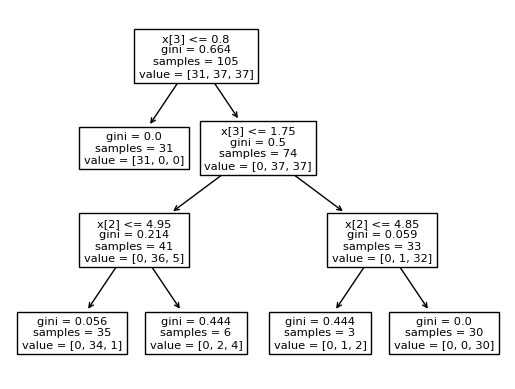

In [60]:
iris_tree = tree.DecisionTreeClassifier(max_depth=3)
iris_tree.fit(X_iris_train, y_iris_train)
tree.plot_tree(iris_tree);

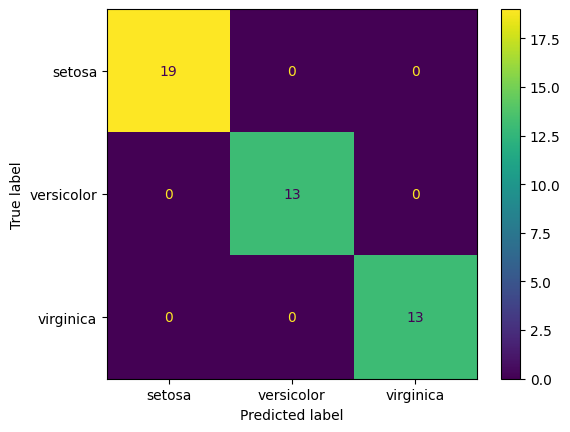

In [61]:
confusion_matrix = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_iris_test, iris_tree.predict(X_iris_test)), display_labels=iris.target_names)
confusion_matrix.plot();

## Simple Tree for MNIST

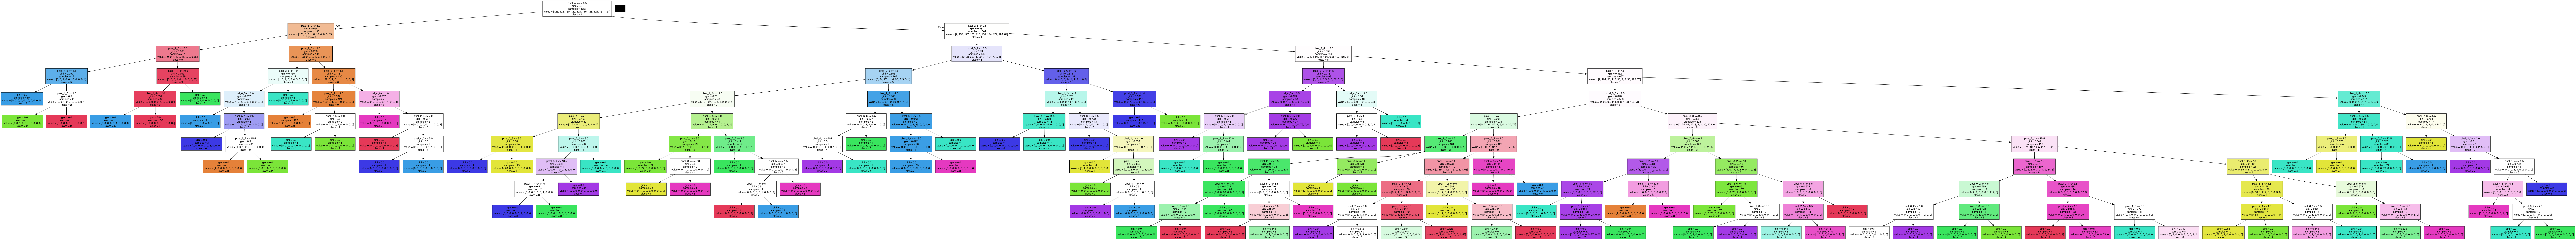

In [106]:
mnist_tree = tree.DecisionTreeClassifier(max_depth=10)
mnist_tree.fit(X_mnist_train, y_mnist_train)

tmp_file = "mnist_tree.dot"
tree.export_graphviz(mnist_tree, feature_names=mnist.feature_names, class_names=mnist.target_names.astype(str), out_file=tmp_file, filled=True)
pydot.graph_from_dot_file(tmp_file)[0].write_png("mnist_tree.png")
pydot.graph_from_dot_file(tmp_file)[0].write_svg("mnist_tree.svg")
Image("mnist_tree.png")

In [104]:
print(f"Accuracy: {metrics.accuracy_score(y_mnist_test, mnist_tree.predict(X_mnist_test))}")

Accuracy: 0.8481481481481481


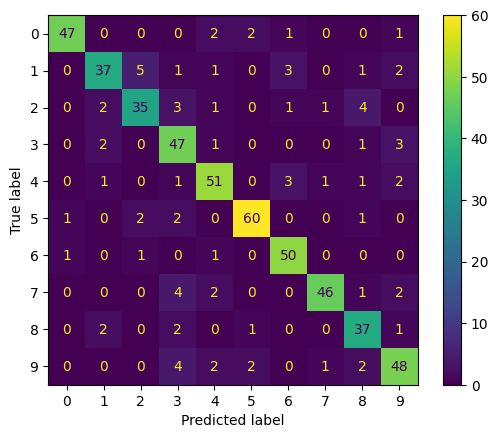

In [105]:
confusion_matrix = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_mnist_test, mnist_tree.predict(X_mnist_test)), display_labels=mnist.target_names)
confusion_matrix.plot();

## Simple Tree for Fashion MNIST

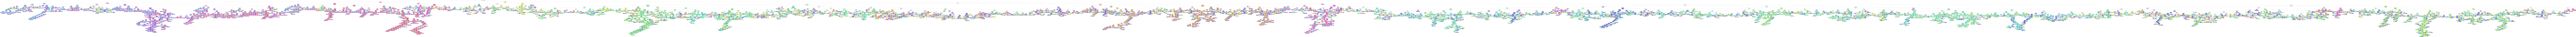

In [107]:
fashion_mnist_tree = tree.DecisionTreeClassifier()
fashion_mnist_tree.fit(X_fmnist_train, y_fmnist_train)

tmp_file = "fashion_mnist_tree.dot"
tree.export_graphviz(fashion_mnist_tree, out_file=tmp_file, filled=True)
pydot.graph_from_dot_file(tmp_file)[0].write_png("fashion_mnist_tree.png")
pydot.graph_from_dot_file(tmp_file)[0].write_svg("fashion_mnist_tree.svg")
Image("fashion_mnist_tree.png")

In [98]:
print(f"Accuracy: {metrics.accuracy_score(y_fmnist_test, fashion_mnist_tree.predict(X_fmnist_test))}")

Accuracy: 0.7941428571428572


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (1).

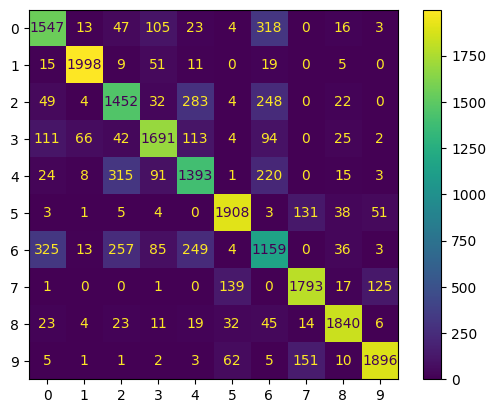

In [99]:
confusion_matrix = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_fmnist_test, fashion_mnist_tree.predict(X_fmnist_test)), display_labels=fashion_mnist.target_names)
confusion_matrix.plot();

## Finding the best Tree Hyperparameters for MNIST

In [118]:
data = []

for depth in tqdm(range(1, 20)):
    for min_samples_split in range(2, 10):
        for min_samples_leaf in range(1, 10):
            for method in ["gini", "entropy", "log_loss"]:
                for splitter in ["best", "random"]:
                    for rdm in range(1, 10):
                        mnist_tree = tree.DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, criterion=method, splitter=splitter, random_state=rdm)
                        mnist_tree.fit(X_mnist_train, y_mnist_train)
                        data.append({"depth": depth, "min_samples_split": min_samples_split, "min_samples_leaf": min_samples_leaf, "method": method, "splitter": splitter, "random_state": rdm, "accuracy": metrics.accuracy_score(y_mnist_test, mnist_tree.predict(X_mnist_test))})

            
data = pd.DataFrame(data)
data.to_csv("mnist_tree_hyperparameters.csv")

100%|██████████| 19/19 [11:52<00:00, 37.50s/it]
